## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [6]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

C:\Users\Swamesh\AppData\Local\Temp\ipykernel_9460\3087887313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'),annot=True)


<Axes: >

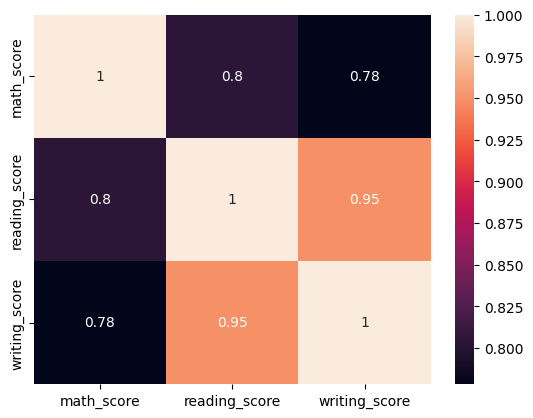

In [12]:
sns.heatmap(df.corr(method = 'spearman'),annot=True)

In [7]:
X = df.drop(columns=['math_score'],axis=1) ## WE CAN ALSO SELECT WRITING,READING OR AVG SCORE

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
y = df['math_score']

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

### Results

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.853635
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.846776
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.751683


## Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

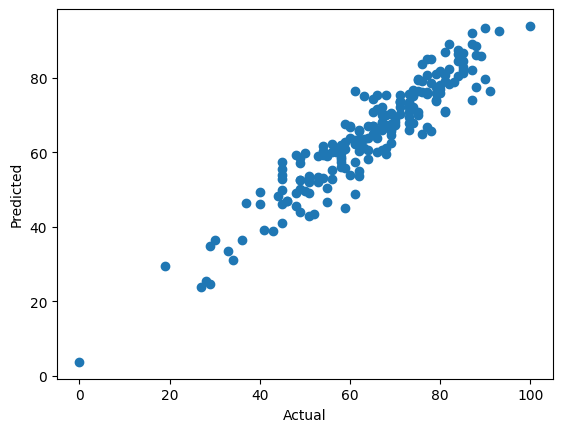

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

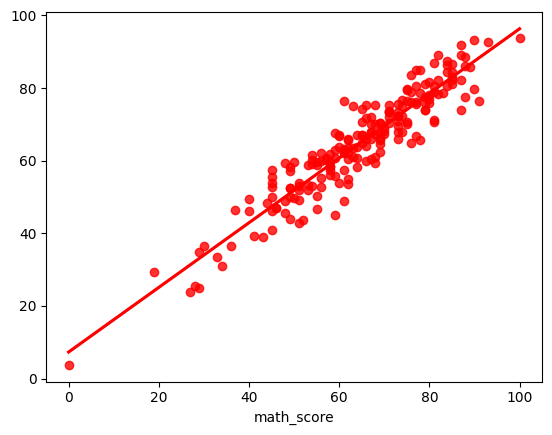

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [48]:
import  pandas as pd

d2 = pd.read_csv(r'C:\Users\Swamesh\Desktop\UDemy\KrishNaik\MLProject1\artifact\train.csv')



In [4]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

oh = OneHotEncoder()
SC=StandardScaler(with_mean=False)
SC1 = StandardScaler()

In [50]:
DD = pd.DataFrame(oh.fit_transform(d1[['race_ethnicity']]).toarray())
DD.columns = oh.get_feature_names_out()

In [51]:
d3 = pd.concat([d2,DD],axis=1).drop('race_ethnicity',axis=1)

In [58]:
d4 = SC.fit_transform(d3[['race_ethnicity_group A','race_ethnicity_group B'	,'race_ethnicity_group C'	,'race_ethnicity_group D'	,'race_ethnicity_group E']])
d4 = pd.DataFrame(d4,columns =['race_ethnicity_group A','race_ethnicity_group B'	,'race_ethnicity_group C'	,'race_ethnicity_group D'	,'race_ethnicity_group E'] )

In [60]:
d4.head()

,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,0.0,0.0,0.000000,2.301779,0.000000
1,0.0,0.0,2.135042,0.000000,0.000000
2,0.0,0.0,0.000000,2.301779,0.000000
3,0.0,0.0,2.135042,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,2.840095


In [64]:
d5 = SC1.fit_transform(d3[['race_ethnicity_group A','race_ethnicity_group B'	,'race_ethnicity_group C'	,'race_ethnicity_group D'	,'race_ethnicity_group E']])
d5 = pd.DataFrame(d5,columns =['race_ethnicity_group A','race_ethnicity_group B'	,'race_ethnicity_group C'	,'race_ethnicity_group D'	,'race_ethnicity_group E'] )

In [65]:
d5.head()

,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E
0,-0.307232,-0.486288,-0.693889,1.720580,-0.411814
1,-0.307232,-0.486288,1.441153,-0.581199,-0.411814
2,-0.307232,-0.486288,-0.693889,1.720580,-0.411814
3,-0.307232,-0.486288,1.441153,-0.581199,-0.411814
4,-0.307232,-0.486288,-0.693889,-0.581199,2.428282


In [1]:
import pandas as pd

In [2]:
A = {
    'A':1,
    'B':2,
    'C':3
    }

In [2]:
list(A)

['A', 'B', 'C']

In [3]:

B = {
   'A' : 10,
   'B' :20,
   'C':30
}

In [4]:
rep1 =[]

In [5]:
rep1.append(
    {
    'A':'Hahaha',
    'B':2,
    'C':3
    }
)

In [31]:
pd.DataFrame(rep1)

,A,B,C
0,Hahaha,2,3


In [6]:
rep1.append({
    'A' : 10,
    'B' :20,
    'C':30
})

In [33]:
pd.DataFrame(rep1)

,A,B,C
0,Hahaha,2,3
1,10,20,30


In [7]:
rep1

[{'A': 'Hahaha', 'B': 2, 'C': 3}, {'A': 10, 'B': 20, 'C': 30}]

In [8]:
C = {
    'A' : 888,
    'B': 454,
    'C':[74,55,55,55]
}


In [9]:
rep1.append(C)

In [10]:
rep1

[{'A': 'Hahaha', 'B': 2, 'C': 3},
 {'A': 10, 'B': 20, 'C': 30},
 {'A': 888, 'B': 454, 'C': [74, 55, 55, 55]}]

In [18]:
D = {
    'A' : 66,
    'B': 88,
    'C':{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                }
}

In [19]:
rep1.append(D)

In [20]:
L = pd.DataFrame(rep1).sort_values(by = 'B',ascending=False)


In [21]:
L

,A,B,C
2,888,454,"[74, 55, 55, 55]"
3,66,88,"{'learning_rate': [0.1, 0.01, 0.05, 0.001], 'n..."
1,10,20,30
0,Hahaha,2,3


In [14]:
maxi = max(L.B)

In [35]:
L[L['B']==88]['C'].tolist()[0]

{'learning_rate': [0.1, 0.01, 0.05, 0.001],
 'n_estimators': [8, 16, 32, 64, 128, 256]}

In [121]:
E.loc[E.B == max(E.B)].A.tolist()

[888]

In [18]:
C = [1444,555,'jajaajja']

In [4]:
import pandas as pd

In [6]:
result = []
for i in range(len(list(A))):
    result.append([list(A)[i],list(A.values())[i],list(B.values())[i]])

In [28]:
pd.DataFrame(result,)

,0,1,2
0,A,1,10
1,B,2,20
2,C,3,30


In [19]:
def val():
    return A,B,C

In [22]:
first,second,third  = val()

In [25]:
third

[1444, 555, 'jajaajja']

In [21]:
max(sorted(rr.values()))

3

In [114]:
list(A.keys())[2]

'C'

In [118]:
A['C']

3

In [130]:
list(A.values())[0]

1

In [127]:
list(A.keys())[
    list(A.values()).index(3)
]

'C'

In [137]:
list(A.keys())[1]

'B'

In [29]:
T = pd.read_csv(r'C:\Users\Swamesh\Desktop\UDemy\KrishNaik\MLProject1\artifact\hyper_param_result.csv')
T

,Models,Best score,Best Params
0,Decision Tree,0.746937,{'criterion': 'squared_error'}
1,Random Forest Regressor,0.853045,{'n_estimators': 128}
2,Gradient Boosting Regressor,0.869870,"{'learning_rate': 0.05, 'loss': 'huber', 'n_es..."
3,Linear Regression,0.880374,{}
4,XGBRegressor,0.862877,"{'learning_rate': 0.05, 'n_estimators': 128}"
5,CatBoosting Regressor,0.856630,"{'depth': 6, 'iterations': 100, 'learning_rate..."
6,AdaBoost Regressor,0.848628,"{'learning_rate': 0.5, 'loss': 'exponential', ..."
7,Lasso_,0.881445,"{'alpha': 0.05, 'max_iter': 10000}"
8,Ridge_,0.880448,"{'alpha': 0.1, 'max_iter': 10000}"
9,K-Neighbors Regressor,0.552083,{'n_neighbors': 20}


In [116]:
list(A.values()).index(3)

2